In [1]:
a = 3

3

In [2]:
] st

Status `/sps/nemo/scratch/mpetro/Projects/PhD/SNSensitivityEstimate/Project.toml`
  [c0cd4b16] BAT v3.3.5
  [fa1fc709] BinnedModels v0.2.0
  [a134a8b2] BlackBoxOptim v0.6.3
  [336ed68f] CSV v0.10.15
  [13f3f980] CairoMakie v0.13.2
  [35d6a980] ColorSchemes v3.29.0
  [a93c6f00] DataFrames v1.7.0
  [1313f7d8] DataFramesMeta v0.15.4
  [b429d917] DensityInterface v0.4.0
  [31c24e10] Distributions v0.25.118
  [634d3b9d] DrWatson v2.18.0
  [68837c9b] FHist v0.11.9
  [09f84164] HypothesisTests v0.11.4
  [8197267c] IntervalSets v0.7.10
  [5ab0869b] KernelDensity v0.6.9
  [b964fa9f] LaTeXStrings v1.4.0
  [d3d80556] LineSearches v7.3.0
  [98b081ad] Literate v2.20.1
  [bdcacae8] LoopVectorization v0.12.172
  [8084c56b] MPGenbb v0.1.0 `https://github.com/Shoram444/MPgenbb.jl.git#MPGenbb-v1.0`
  [20f20a25] MakieCore v0.9.1
  [0a4f8689] MathTeXEngine v0.6.2
  [eff96d63] Measurements v2.12.0
  [429524aa] Optim v1.12.0
  [91a5bcdd] Plots v1.40.11
⌅ [c3e4b0f8] Pluto v0.20.4
  [359b1769] PlutoStaticHTML

In [3]:
using CSV, DataFramesMeta, CairoMakie, StatsBase

Precompiling CSV
  ✓ CodecZlib
  ✓ InlineStrings
  ✓ FilePathsBase
  ✓ InlineStrings → ParsersExt
  ✓ FilePathsBase → FilePathsBaseMmapExt
  ✓ WeakRefStrings
  ✓ FilePathsBase → FilePathsBaseTestExt
  ✓ CSV
  8 dependencies successfully precompiled in 18 seconds. 17 already precompiled.
Precompiling DataFramesMeta
  ✓ Unitful → InverseFunctionsUnitfulExt
  ✓ StringManipulation
  ✓ Unitful → ConstructionBaseUnitfulExt
  ✓ DataStructures
  ✓ SortingAlgorithms
  ✓ PrettyTables
  ✓ DataFrames
  ✓ DataFramesMeta
  8 dependencies successfully precompiled in 61 seconds. 30 already precompiled.
Precompiling CairoMakie
  ✓ ChangesOfVariables → ChangesOfVariablesInverseFunctionsExt
  ✓ Requires
  ✓ NaNMath
  ✓ EnumX
  ✓ URIs
  ✓ DocStringExtensions
  ✓ Atomix
  ✓ SimpleTraits
  ✓ OffsetArrays
  ✓ ProgressMeter
  ✓ isoband_jll
  ✓ OpenSSL_jll
  ✓ Libuuid_jll
  ✓ OpenBLASConsistentFPCSR_jll
  ✓ OpenSpecFun_jll
  ✓ LLVMOpenMP_jll
  ✓ Imath_jll
  ✓ QuadGK
  ✓ CRlibm_jll
  ✓ IntelOpenMP_jll
  ✓ XML2_

In [29]:
t = Float64[]
signal = "bb0nu_foil_bulk"
processMode = "sumE"

"sumE"

In [30]:
for f in readdir("data_perBkg_10keV_binning")
    if (occursin(signal, f) && occursin(processMode, f))
        d = CSV.File(joinpath("data_perBkg_10keV_binning", f)) |> DataFrame
        filter!(x -> x.thalf .> 0, d)
        append!(t, d.thalf)
    end
end

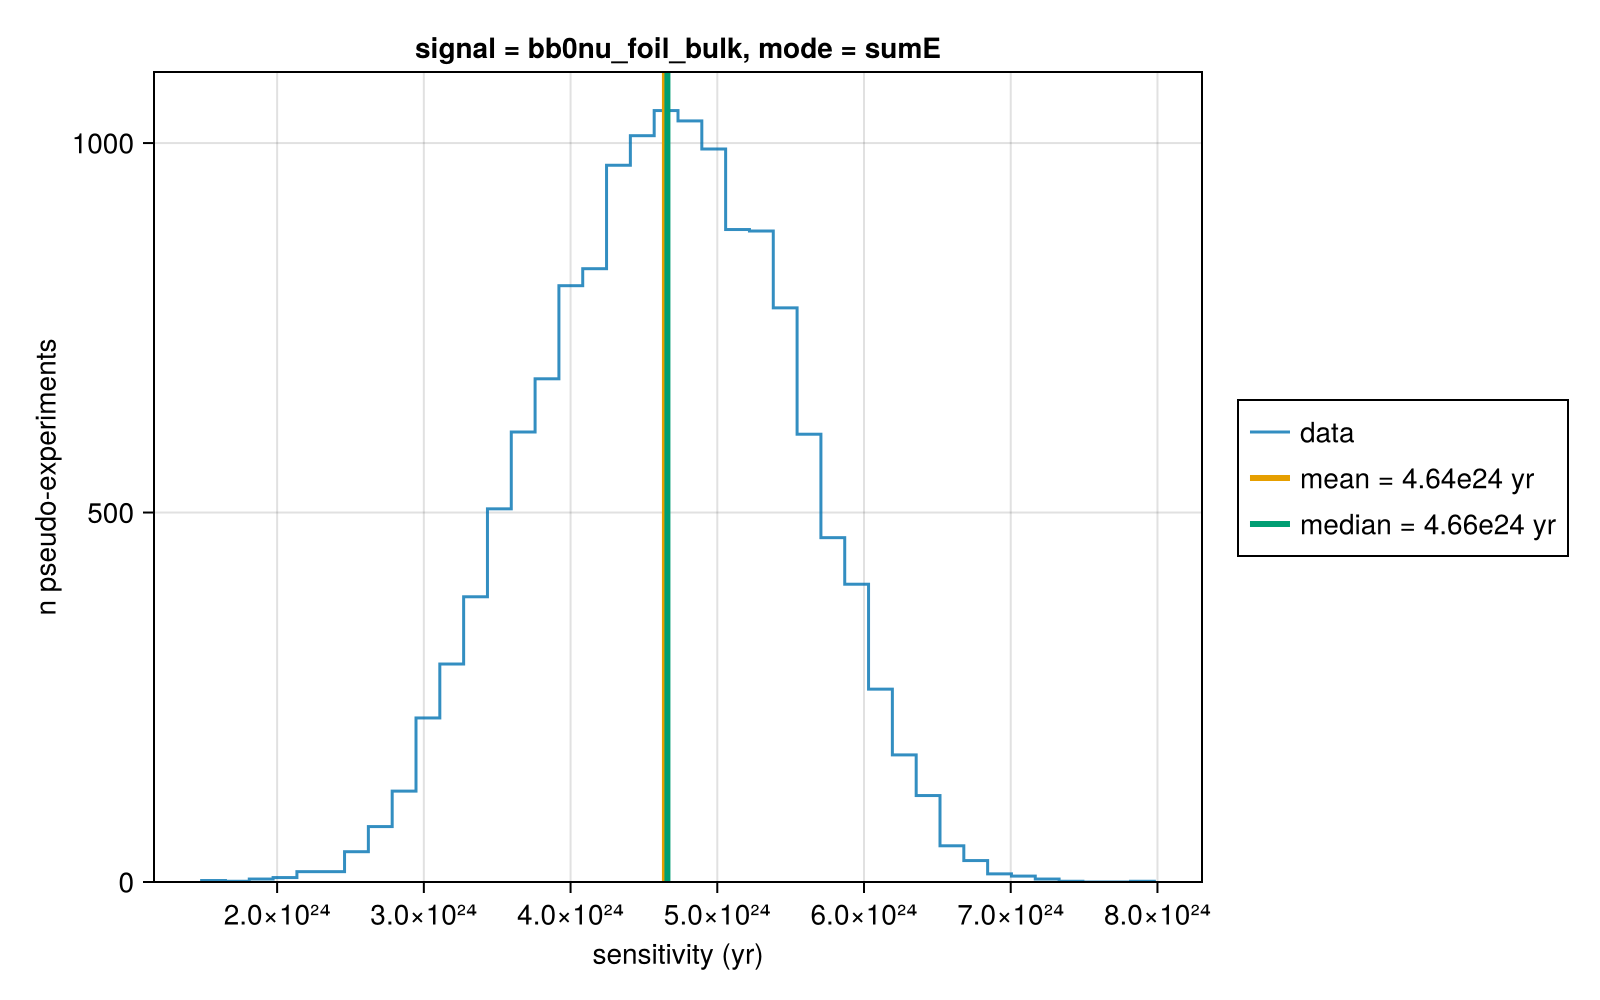

In [31]:
let
    f = Figure(size = (800, 500))
    a = Axis(
        f[1,1], xlabel = "sensitivity (yr)", 
        ylabel = ("n pseudo-experiments"), limits = (nothing, nothing, 0, nothing), 
        title = "signal = $signal, mode = $processMode"
    )
    p1 = stephist!(a,t, bins = 40, label = "data")
    p2 = vlines!(
        a, 
        [mean(t)], 
        color = Makie.wong_colors()[2],
        linewidth = 3
    )
    p3 = vlines!(
        a, 
        [median(t)], 
        color = Makie.wong_colors()[3],
        linewidth = 3
    )

    Legend(f[1,2], [p1, p2, p3], ["data", "mean = $(round(mean(t), sigdigits = 3)) yr", "median = $(round(median(t), sigdigits = 3)) yr"])
    save("result_$(signal)_$(processMode).png", f)
    f
end